<a href="https://colab.research.google.com/github/syedX022/DataScience_GroupProject_Team1/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train (1).csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Select features (X) and target variable (y = price)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [6]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fitting a regression model

In [7]:
from sklearn.impute import SimpleImputer

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Handle missing values (impute with median)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Get predictions for the test set
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import r2_score

# Calculate and print R2 score on test set
r2 = r2_score(y_test, y_pred)
print("R² score on test set:", r2)

R² score on test set: 0.6832698040593941


In [10]:
# Show model coefficients and intercept
print("Intercept:", model.intercept_)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coefficients.head(10))  # show first 10 rows




Intercept: -592964.1617973999
        Feature  Coefficient
0            Id     0.745864
1    MSSubClass    28.352947
2   LotFrontage     4.889225
3       LotArea     0.669162
4   OverallQual  6400.863114
5   OverallCond  5913.310583
6     YearBuilt   355.347146
7  YearRemodAdd   123.417083
8    MasVnrArea    22.081806
9    BsmtFinSF1    16.751612


#My Observations
 The Linear Regression model was successfully trained on the processed dataset.

- The **R² score** on the test set indicates how much of the variation in house prices the model explains.

- Model coefficients show which features have the strongest positive or negative relationship with house price.
  - Positive coefficients: increase in feature value leads to higher sale price.
  - Negative coefficients: increase in feature value leads to lower sale price.

- The intercept represents the baseline house price when all feature values are zero (not directly interpretable, but useful mathematically).

### Key Takeaways

- Proper **data cleaning** (handling categorical data and missing values) is essential before fitting regression.
- Coefficients provide **business insights** into which house characteristics drive value.
- R² score gives a quick measure of **model performance** on unseen data.

# Muzamil's PART

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("mae is :", mae)
print("rmse is :", rmse)


mae is : 20498.507156910982
rmse is : 49289.186669397815


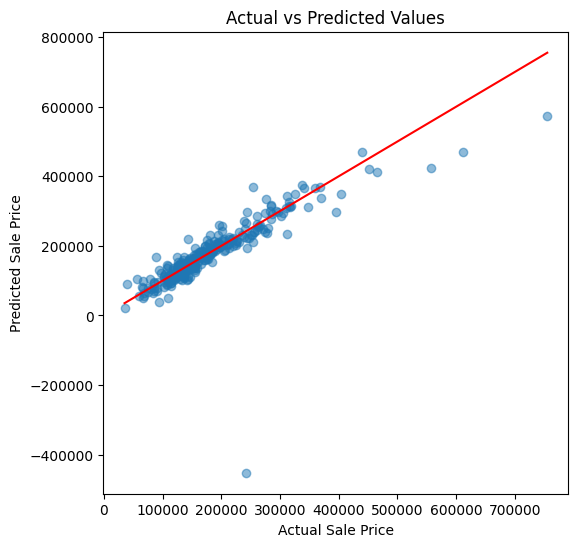

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.show()


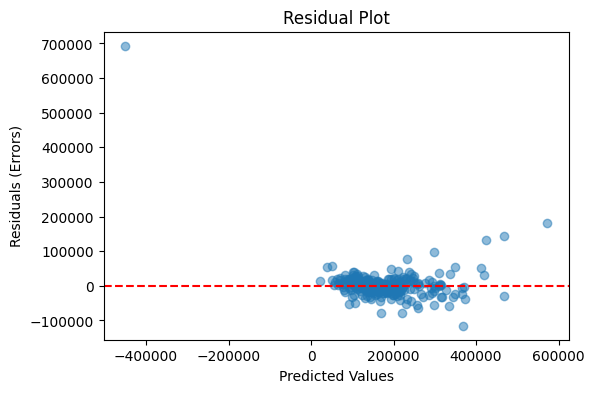

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()


# Comments about model performance

mae is  reasonable error but depending on the average house price in your dataset it may or may not be acceptable.

rmse suggests some houses are much harder for the model to predict accurately.

0.68 is r2 explains about 68% of the variance in house prices


The model is performing reasonably well for a first pass but has room for improvement with feature engineering, interaction terms, or more complex models